In [2]:
import kagglehub

path = kagglehub.dataset_download("ashirwadsangwan/imdb-dataset")
print("Path to dataset files:", path)

C:\Users\dilip\AppData\Roaming\Python\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\dilip\.cache\kagglehub\datasets\ashirwadsangwan\imdb-dataset\versions\865


In [ ]:
%pip install pandas

Defaulting to user installation because normal site-packages is not writeable
  Using cached numpy-2.3.5-cp312-cp312-win_amd64.whl.metadata (60 kB)
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
    --------------------------------------- 0.3/11.0 MB ? eta -:--:--
   ---- ----------------------------------- 1.3/11.0 MB 5.6 MB/s eta 0:00:02
   ---------- ----------------------------- 2.9/11.0 MB 6.2 MB/s eta 0:00:02
   ------------- -------------------------- 3.7/11.0 MB 5.7 MB/s eta 0:00:02
   ------------------ --------------------- 5.0/11.0 MB 5.6 MB/s eta 0:00:02
   --------------------- ------------------ 6.0/11.0 MB 5.3 MB/s eta 0:00:01
   -------------------------- ------------- 7.3/11.0 MB 5.6 MB/s eta 0:00:01
   -------------------------------- ------- 8.9/11.0 MB 5.8 MB/s eta 0:00:01
   ---------------------------------------  10.7/11.0 MB 6.2 MB/s eta 0:00:01
   ---------------------------------------- 11.0/11.0 MB 5.8 MB/s eta 0:00:00
   --------------


[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
import os
os.listdir(path)

import pandas as pd

basics = pd.read_csv(
    path + "/title.basics.tsv",
    sep="\t",
    na_values="\\N"
)

ratings = pd.read_csv(
    path + "/title.ratings.tsv",
    sep="\t",
    na_values="\\N"
)

basics.head(), ratings.head()

C:\Users\dilip\AppData\Local\Temp\ipykernel_4372\128757478.py:6: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  basics = pd.read_csv(


(      tconst titleType            primaryTitle           originalTitle  \
 0  tt0000001     short              Carmencita              Carmencita   
 1  tt0000002     short  Le clown et ses chiens  Le clown et ses chiens   
 2  tt0000003     short            Poor Pierrot          Pauvre Pierrot   
 3  tt0000004     short             Un bon bock             Un bon bock   
 4  tt0000005     short        Blacksmith Scene        Blacksmith Scene   
 
    isAdult  startYear  endYear runtimeMinutes                    genres  
 0        0     1894.0      NaN            1.0         Documentary,Short  
 1        0     1892.0      NaN            5.0           Animation,Short  
 2        0     1892.0      NaN            5.0  Animation,Comedy,Romance  
 3        0     1892.0      NaN           12.0           Animation,Short  
 4        0     1893.0      NaN            1.0                     Short  ,
       tconst  averageRating  numVotes
 0  tt0000001            5.7      2188
 1  tt0000002      

In [7]:
df = pd.merge(basics, ratings, on="tconst")
df.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0000001,short,Carmencita,Carmencita,0,1894.0,NaN,1.0,"Documentary,Short",5.7,2188
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892.0,NaN,5.0,"Animation,Short",5.5,307
2,tt0000003,short,Poor Pierrot,Pauvre Pierrot,0,1892.0,NaN,5.0,"Animation,Comedy,Romance",6.4,2274
3,tt0000004,short,Un bon bock,Un bon bock,0,1892.0,NaN,12.0,"Animation,Short",5.1,197
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893.0,NaN,1.0,Short,6.2,3012


In [9]:
df = df[df["titleType"] == "movie"]
df.shape
df["titleType"].value_counts()

titleType
movie    336125
Name: count, dtype: int64

In [10]:
df = df.dropna(subset=["startYear", "runtimeMinutes", "averageRating"])

df["startYear"] = df["startYear"].astype(int)
df["runtimeMinutes"] = df["runtimeMinutes"].astype(int)
df["averageRating"] = df["averageRating"].astype(float)
df["numVotes"] = df["numVotes"].astype(int)

df.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
8,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894,NaN,45,Romance,5.2,231
144,tt0000147,movie,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,0,1897,NaN,100,"Documentary,News,Sport",5.3,578
285,tt0000335,movie,Soldiers of the Cross,Soldiers of the Cross,0,1900,NaN,40,"Biography,Drama",5.5,64
383,tt0000502,movie,Bohemios,Bohemios,0,1905,NaN,100,NaN,3.1,25
420,tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906,NaN,70,"Action,Adventure,Biography",6.0,1039


In [11]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 303124 entries, 8 to 1608010
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   tconst          303124 non-null  object 
 1   titleType       303124 non-null  object 
 2   primaryTitle    303124 non-null  object 
 3   originalTitle   303124 non-null  object 
 4   isAdult         303124 non-null  int64  
 5   startYear       303124 non-null  int64  
 6   endYear         0 non-null       float64
 7   runtimeMinutes  303124 non-null  int64  
 8   genres          296810 non-null  object 
 9   averageRating   303124 non-null  float64
 10  numVotes        303124 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 27.8+ MB


,isAdult,startYear,endYear,runtimeMinutes,averageRating,numVotes
count,303124.000000,303124.000000,0.0,303124.000000,303124.000000,3.031240e+05
mean,0.013265,1997.161940,NaN,94.657579,6.163240,4.083019e+03
std,0.114408,26.009645,NaN,176.999665,1.351876,3.940979e+04
min,0.000000,1894.000000,NaN,1.000000,1.000000,5.000000e+00
25%,0.000000,1981.000000,NaN,80.000000,5.400000,2.400000e+01
50%,0.000000,2008.000000,NaN,91.000000,6.300000,8.000000e+01
75%,0.000000,2017.000000,NaN,104.000000,7.100000,3.990000e+02
max,1.000000,2026.000000,NaN,59460.000000,10.000000,3.128869e+06


In [12]:
%pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
  Using cached matplotlib-3.10.8-cp312-cp312-win_amd64.whl.metadata (52 kB)
  Using cached contourpy-1.3.3-cp312-cp312-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.61.1-cp312-cp312-win_amd64.whl.metadata (116 kB)
  Using cached kiwisolver-1.4.9-cp312-cp312-win_amd64.whl.metadata (6.4 kB)
  Using cached pillow-12.0.0-cp312-cp312-win_amd64.whl.metadata (9.0 kB)
Using cached matplotlib-3.10.8-cp312-cp312-win_amd64.whl (8.1 MB)
Using cached contourpy-1.3.3-cp312-cp312-win_amd64.whl (226 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.61.1-cp312-cp312-win_amd64.whl (2.3 MB)
Using cached kiwisolver-1.4.9-cp312-cp312-win_amd64.whl (73 kB)
Using cached pillow-12.0.0-cp312-cp312-win_amd64.whl (7.0 MB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


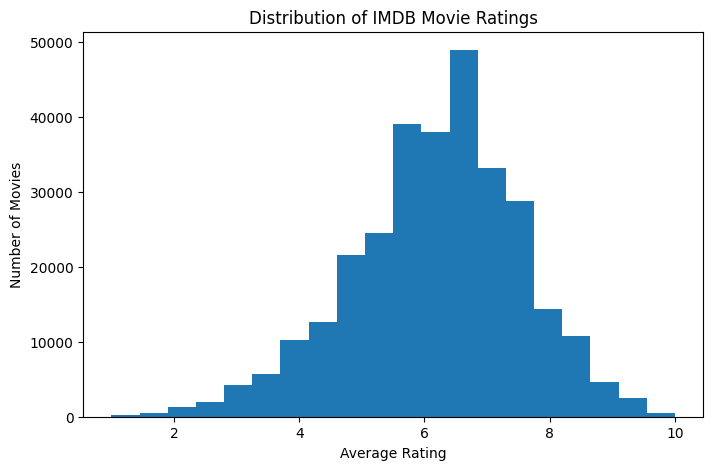

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.hist(df["averageRating"], bins=20)
plt.xlabel("Average Rating")
plt.ylabel("Number of Movies")
plt.title("Distribution of IMDB Movie Ratings")
plt.show()

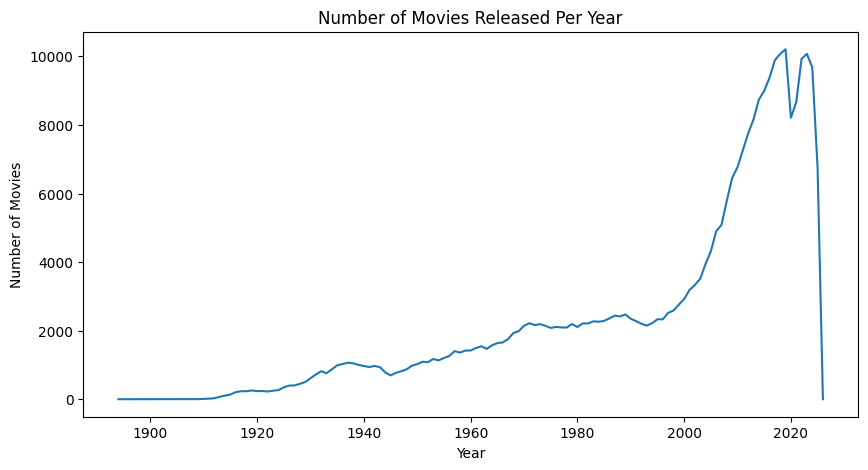

In [14]:
movies_per_year = df["startYear"].value_counts().sort_index()

plt.figure(figsize=(10,5))
plt.plot(movies_per_year.index, movies_per_year.values)
plt.xlabel("Year")
plt.ylabel("Number of Movies")
plt.title("Number of Movies Released Per Year")
plt.show()

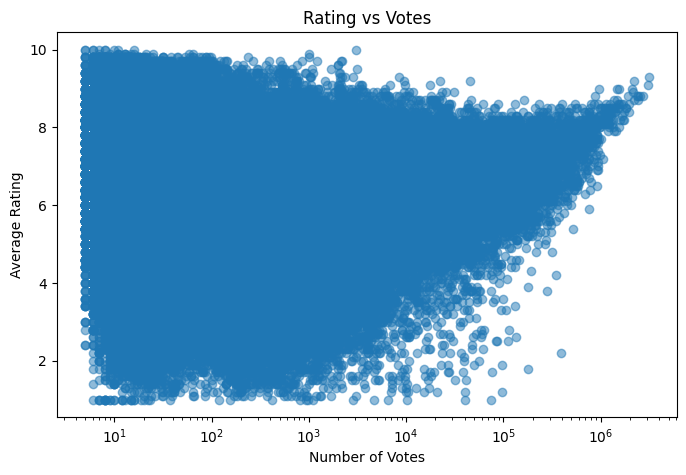

In [15]:
plt.figure(figsize=(8,5))
plt.scatter(df["numVotes"], df["averageRating"], alpha=0.5)
plt.xlabel("Number of Votes")
plt.ylabel("Average Rating")
plt.title("Rating vs Votes")
plt.xscale("log")
plt.show()

In [16]:
top_rated = df[df["numVotes"] > 1000].sort_values(
    "averageRating", ascending=False
).head(10)

top_rated[["primaryTitle", "startYear", "averageRating", "numVotes"]]

,primaryTitle,startYear,averageRating,numVotes
1275479,Thadai Athai Udai,2025,10.0,3024
1277685,Premam Madhuram,2025,9.9,1013
1279736,Paatashaala,2025,9.8,1015
1237700,Kousalya Tanaya Ragava,2025,9.7,1201
1058332,Maruva Tarama,2025,9.7,2139
1278760,Itlu Me Yedava,2025,9.7,2193
1244058,Gopi Galla Goa Trip (3GT),2025,9.6,1982
1254985,Jigris,2025,9.6,1991
1257046,Raju Gaani Savaal,2025,9.5,1083
1193820,Mannu Kya Karegga,2025,9.5,3110
